In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 23_03_2022 07_34_00.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 16_03_2022 07_33_42.xlsx')

In [5]:
filtrado = dados[['Competencia Internacao','Houve internacao','Classificacao final','Evolucao','Faixa Etaria','Idade']]
filtrado = filtrado.dropna()
filtrado

,Competencia Internacao,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
0,2020_01,Sim,SRAG não especificado,Cura,0-9 anos,6.0
1,2020_01,Sim,SRAG não especificado,Cura,0-9 anos,4.0
2,2020_01,Sim,SRAG não especificado,Cura,0-9 anos,7.0
3,2020_02,Sim,SRAG não especificado,Cura,0-9 anos,0.0
4,2020_02,Sim,SRAG não especificado,Cura,0-9 anos,0.0
...,...,...,...,...,...,...
168336,2021_06,Sim,COVID-19,Óbito,40-49 anos,47.0
168337,2021_10,Sim,COVID-19,Óbito,60-69 anos,65.0
168338,2021_10,Sim,COVID-19,Óbito,60-69 anos,67.0
168339,2021_11,Sim,COVID-19,Ignorado,60-69 anos,60.0


In [6]:
filtrado['Idade'] = filtrado['Idade'].astype(int)
filtrado.head(20)

,Competencia Internacao,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
0,2020_01,Sim,SRAG não especificado,Cura,0-9 anos,6
1,2020_01,Sim,SRAG não especificado,Cura,0-9 anos,4
2,2020_01,Sim,SRAG não especificado,Cura,0-9 anos,7
3,2020_02,Sim,SRAG não especificado,Cura,0-9 anos,0
4,2020_02,Sim,SRAG não especificado,Cura,0-9 anos,0
5,2020_03,Sim,SRAG não especificado,Cura,0-9 anos,2
6,2020_03,Sim,SRAG não especificado,Cura,0-9 anos,5
7,2020_03,Sim,SRAG não especificado,Cura,30-39 anos,31
8,2020_03,Sim,SRAG não especificado,Cura,30-39 anos,36
9,2020_03,Sim,SRAG não especificado,Cura,50-59 anos,51


In [7]:
for index, idade in filtrado.iterrows():
    if idade['Idade'] < 12:
        filtrado.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado.loc[index,'Idade'] = '80 e mais'

In [8]:
filtrado = filtrado.loc[filtrado['Houve internacao']=='Sim']
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado = filtrado.loc[filtrado['Evolucao']=='Óbito']
filtrado.head()

,Competencia Internacao,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
37,2020_04,Sim,COVID-19,Óbito,70-79 anos,60-79 anos
83,2020_05,Sim,COVID-19,Óbito,70-79 anos,60-79 anos
96,2020_06,Sim,COVID-19,Óbito,60-69 anos,60-79 anos
112,2020_06,Sim,COVID-19,Óbito,80 e mais anos,80 e mais
117,2020_06,Sim,COVID-19,Óbito,60-69 anos,60-79 anos


In [9]:
totalHospitalizacoes = filtrado.groupby('Competencia Internacao').count()
totalHospitalizacoes = totalHospitalizacoes.drop('2020_03')
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
Competencia Internacao,,,,,
2020_04,101,101,101,101,101
2020_05,231,231,231,231,231
2020_06,708,708,708,708,708
2020_07,1691,1691,1691,1691,1691
2020_08,1478,1478,1478,1478,1478


In [10]:
separaIdade = filtrado.groupby(['Idade','Competencia Internacao']).count()
separaIdade.tail()

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
80 e mais 2021_11                              110                  110   
          2021_12                               40                   40   
          2022_01                              414                  414   
          2022_02                              440                  440   
          2022_03                               71                   71   

                                  Evolucao  Faixa Etaria  
Idade     Competencia Internacao                          
80 e mais 2021_11                      110           110  
          2021_12                       40            40  
          2022_01                      414           414  
          2022_02                      440           440  
          2022_03                       71            71

In [28]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
#idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
#idade11 = idade11.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
#idade11 = idade11.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
#idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
#idade11 = idade11.drop('2020_03')
#idade11 = idade11['Proporcao']
idade11

,Idade,Houve internacao,Classificacao final,Evolucao,Faixa Etaria
Competencia Internacao,,,,,
2020_04,0-11 anos,1,1,1,1
2020_07,0-11 anos,2,2,2,2
2020_08,0-11 anos,2,2,2,2
2020_10,0-11 anos,3,3,3,3
2021_01,0-11 anos,2,2,2,2
2021_02,0-11 anos,4,4,4,4
2021_03,0-11 anos,4,4,4,4
2021_04,0-11 anos,1,1,1,1
2021_05,0-11 anos,1,1,1,1


In [33]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
#idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade19 = idade19.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
#idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
#idade19 = idade19.drop('2020_03')
#idade19 = idade19['Proporcao']
idade19

,Idade_x,Houve internacao_x,Classificacao final_x,Evolucao_x,Faixa Etaria_x
Competencia Internacao,,,,,
2020_04,NaN,NaN,NaN,NaN,NaN
2020_05,NaN,NaN,NaN,NaN,NaN
2020_06,12-19 anos,2.0,2.0,2.0,2.0
2020_07,12-19 anos,2.0,2.0,2.0,2.0
2020_08,12-19 anos,4.0,4.0,4.0,4.0
2020_09,12-19 anos,1.0,1.0,1.0,1.0
2020_10,12-19 anos,2.0,2.0,2.0,2.0
2020_11,NaN,NaN,NaN,NaN,NaN
2020_12,12-19 anos,2.0,2.0,2.0,2.0


In [32]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
#idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
#idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
#idade39 = idade39.drop('2020_03')
#idade39 = idade39['Proporcao']
idade39

,Idade_x,Houve internacao_x,Classificacao final_x,Evolucao_x,Faixa Etaria_x
Competencia Internacao,,,,,
2020_04,20-39 anos,4,4,4,4
2020_05,20-39 anos,12,12,12,12
2020_06,20-39 anos,28,28,28,28
2020_07,20-39 anos,55,55,55,55
2020_08,20-39 anos,40,40,40,40
2020_09,20-39 anos,33,33,33,33
2020_10,20-39 anos,21,21,21,21
2020_11,20-39 anos,52,52,52,52
2020_12,20-39 anos,42,42,42,42


In [34]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
#idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
#idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
#idade59 = idade59.drop(['2020_03'])
#idade59 = idade59['Proporcao']
idade59

,Idade_x,Houve internacao_x,Classificacao final_x,Evolucao_x,Faixa Etaria_x
Competencia Internacao,,,,,
2020_03,40-59 anos,4,4,4,4
2020_04,40-59 anos,13,13,13,13
2020_05,40-59 anos,40,40,40,40
2020_06,40-59 anos,143,143,143,143
2020_07,40-59 anos,275,275,275,275
2020_08,40-59 anos,244,244,244,244
2020_09,40-59 anos,161,161,161,161
2020_10,40-59 anos,130,130,130,130
2020_11,40-59 anos,215,215,215,215


In [35]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
#idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
#idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
#idade79 = idade79.drop(['2020_03'])
#idade79 = idade79['Proporcao']
idade79

,Idade_x,Houve internacao_x,Classificacao final_x,Evolucao_x,Faixa Etaria_x
Competencia Internacao,,,,,
2020_03,60-79 anos,15,15,15,15
2020_04,60-79 anos,51,51,51,51
2020_05,60-79 anos,108,108,108,108
2020_06,60-79 anos,364,364,364,364
2020_07,60-79 anos,878,878,878,878
2020_08,60-79 anos,761,761,761,761
2020_09,60-79 anos,587,587,587,587
2020_10,60-79 anos,490,490,490,490
2020_11,60-79 anos,779,779,779,779


In [36]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
#idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Houve internacao_y','Classificacao final_y','Evolucao_y','Faixa Etaria_y','Idade_y'])
#idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
#idade80 = idade80.drop(['2020_03'])
#idade80 = idade80['Proporcao']
idade80

,Idade_x,Houve internacao_x,Classificacao final_x,Evolucao_x,Faixa Etaria_x
Competencia Internacao,,,,,
2020_03,80 e mais,9,9,9,9
2020_04,80 e mais,32,32,32,32
2020_05,80 e mais,71,71,71,71
2020_06,80 e mais,171,171,171,171
2020_07,80 e mais,479,479,479,479
2020_08,80 e mais,427,427,427,427
2020_09,80 e mais,318,318,318,318
2020_10,80 e mais,275,275,275,275
2020_11,80 e mais,409,409,409,409


In [22]:
competencia = idade80.to_frame()
competencia = competencia.reset_index()
competencia = competencia['Competencia Internacao']
competencia

0     2020_04
1     2020_05
2     2020_06
3     2020_07
4     2020_08
5     2020_09
6     2020_10
7     2020_11
8     2020_12
9     2021_01
10    2021_02
11    2021_03
12    2021_04
13    2021_05
14    2021_06
15    2021_07
16    2021_08
17    2021_09
18    2021_10
19    2021_11
20    2021_12
21    2022_01
22    2022_02
23    2022_03
Name: Competencia Internacao, dtype: object

In [23]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [24]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 23_3_2022'

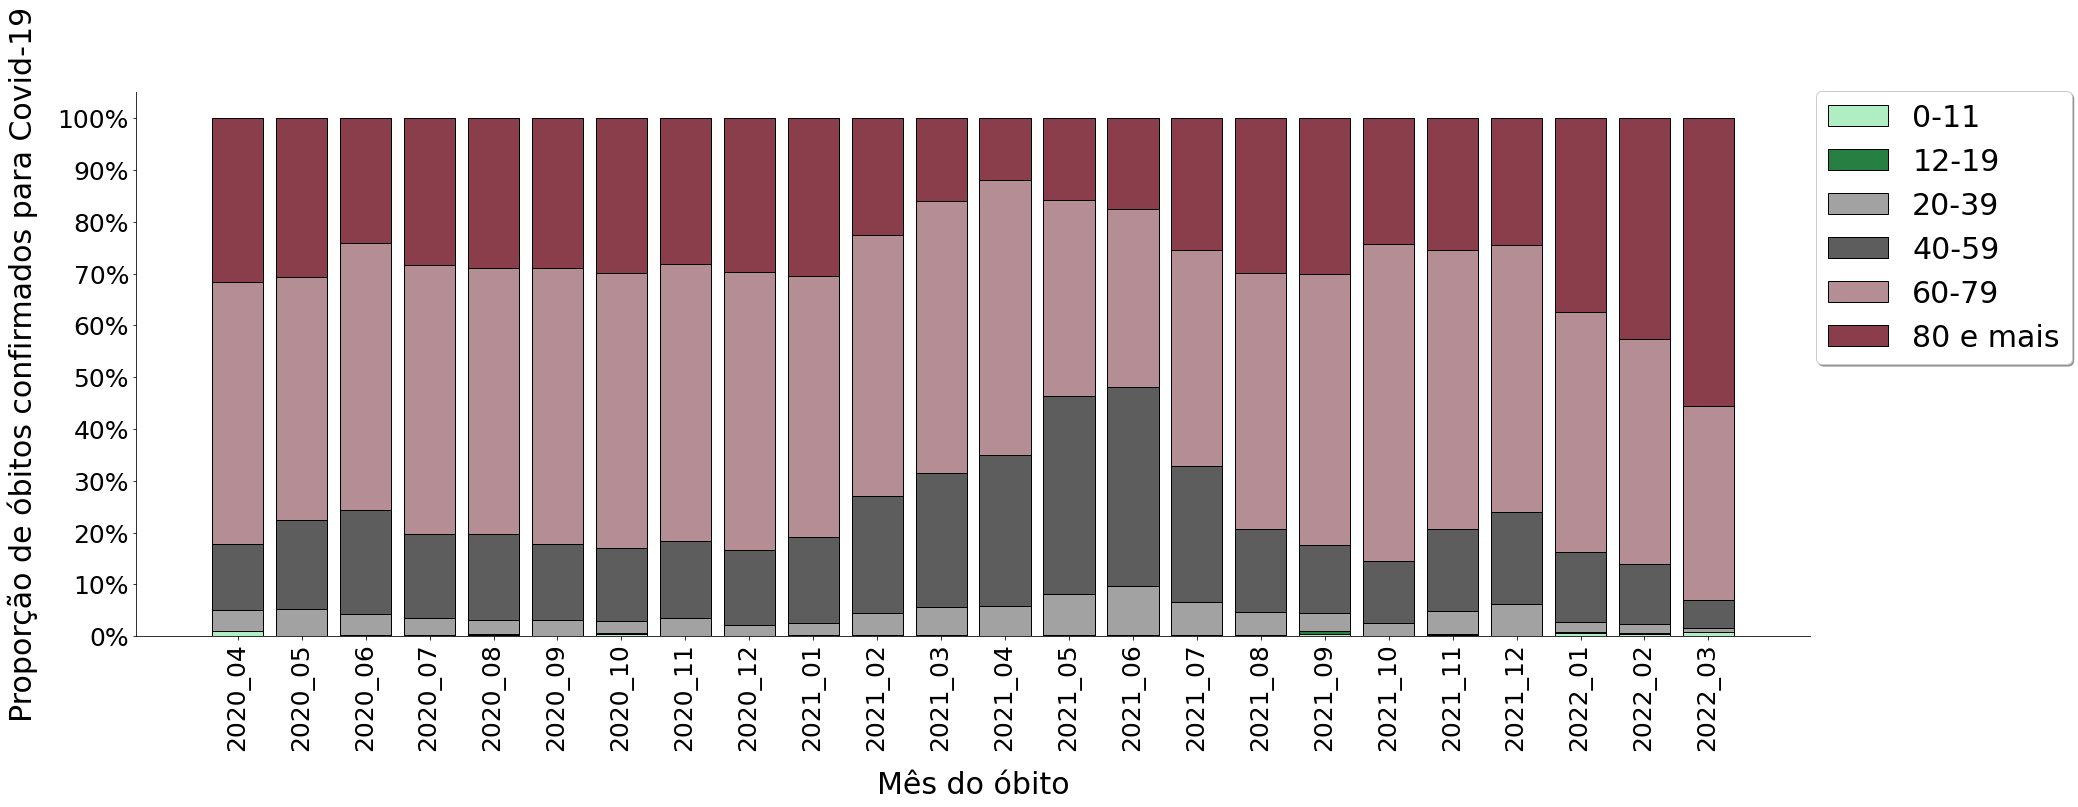

In [25]:
plt.figure(figsize=(30,10))
plt.bar(competencia,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(competencia,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(competencia,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(competencia,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(competencia,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(competencia,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide11.png',dpi=720,bbox_inches='tight')

In [ ]:
totalHospitalizacoes

,Houve internacao,Classificacao final,Evolucao,Faixa Etaria,Idade
Competencia Internacao,,,,,
2020_04,101,101,101,101,101
2020_05,231,231,231,231,231
2020_06,708,708,708,708,708
2020_07,1691,1691,1691,1691,1691
2020_08,1478,1478,1478,1478,1478
2020_09,1100,1100,1100,1100,1100
2020_10,921,921,921,921,921
2020_11,1455,1455,1455,1455,1455
2020_12,2102,2102,2102,2102,2102


In [ ]:
teste_hosp_total = totalHospitalizacoes['2022_01':]
teste_hosp_total = teste_hosp_total['Houve internacao'].sum()
teste_hosp_total

2131

In [ ]:
separaIdade

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_04                                1                    1   
          2020_07                                2                    2   
          2020_08                                2                    2   
          2020_10                                3                    3   
          2021_01                                2                    2   
...                                            ...                  ...   
80 e mais 2021_11                              109                  109   
          2021_12                               40                   40   
          2022_01                              411                  411   
          2022_02                              423                  423   
          2022_03                               38                   38   

                                  Evolucao  Faixa Etaria  
Idade     Competencia Internacao                          
0-11 anos 2020_04                        1             1  
          2020_07                        2             2  
          2020_08                        2             2  
          2020_10                        3             3  
          2021_01                        2             2  
...                                    ...           ...  
80 e mais 2021_11                      109           109  
          2021_12                       40            40  
          2022_01                      411           411  
          2022_02                      423           423  
          2022_03                       38            38  

[132 rows x 4 columns]

In [ ]:
teste_anos11 = separaIdade.reset_index()
teste_anos11 = teste_anos11.loc[teste_anos11['Idade']=='0-11 anos']
#teste_anos11 = teste_anos11['Houve internacao'].sum()
teste_anos11 = teste_anos11.set_index('Competencia Internacao')
teste_anos11 = teste_anos11['2022_01':]
teste_anos11 = teste_anos11['Houve internacao'].sum()
teste_anos11

12

In [ ]:
teste_result_anos11 = teste_anos11/teste_hosp_total * 100
teste_result_anos11

0.5631159080244017

In [ ]:
teste_anos60 = separaIdade.reset_index()
teste_anos60 = teste_anos60.loc[teste_anos60['Idade']=='60-79 anos']
#
teste_anos60 = teste_anos60.set_index('Competencia Internacao')
teste_anos60 = teste_anos60['2022_01':]
teste_anos60 = teste_anos60['Houve internacao'].sum()
teste_anos60

940

In [ ]:
teste_result_anos60 = teste_anos60/teste_hosp_total * 100
teste_result_anos60

44.110746128578135

In [ ]:
teste_anos80 = separaIdade.reset_index()
teste_anos80 = teste_anos80.loc[teste_anos80['Idade']=='80 e mais']
#teste_anos80 = teste_anos80['Houve internacao'].sum()
teste_anos80 = teste_anos80.set_index('Competencia Internacao')
teste_anos80 = teste_anos80['2022_01':]
teste_anos80 = teste_anos80['Houve internacao'].sum()
teste_anos80

872

In [ ]:
teste_result_anos80 = teste_anos80/teste_hosp_total * 100
teste_result_anos80

40.91975598310652